In [2]:
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: c:\users\never\appdata\local\programs\python\python37\etc\jupyter
    - Validating...
      voila 0.2.4 ok


In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.8MB/s 
     |████████████████████████████████| 1.0MB 13.7MB/s 
     |████████████████████████████████| 194kB 21.5MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 2.6MB 17.6MB/s 
Mounted at /content/gdrive


In [ ]:
ls gdrive


'My Drive'/


In [ ]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 1.9MB 2.7MB/s 
     |████████████████████████████████| 204kB 19.5MB/s 
     |████████████████████████████████| 112kB 21.7MB/s 
     |████████████████████████████████| 552kB 17.9MB/s 
ERROR: nbdev 1.1.4 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
weather_types = 'cloudy','rain', 'shine', 'sunrise'
path = Path('gdrive/My Drive/CV/4ClassClassification')

In [ ]:
fns = get_image_files(path)
fns


(#1125) [Path('gdrive/My Drive/CV/4ClassClassification/rain/rain114.jpg'),Path('gdrive/My Drive/CV/4ClassClassification/rain/rain127.jpg'),Path('gdrive/My Drive/CV/4ClassClassification/rain/rain123.jpg'),Path('gdrive/My Drive/CV/4ClassClassification/rain/rain105.jpg'),Path('gdrive/My Drive/CV/4ClassClassification/rain/rain129.jpg'),Path('gdrive/My Drive/CV/4ClassClassification/rain/rain101.jpg'),Path('gdrive/My Drive/CV/4ClassClassification/rain/rain130.jpg'),Path('gdrive/My Drive/CV/4ClassClassification/rain/rain104.jpg'),Path('gdrive/My Drive/CV/4ClassClassification/rain/rain11.jpg'),Path('gdrive/My Drive/CV/4ClassClassification/rain/rain120.jpg')...]

In [ ]:
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
weather = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = weather.dataloaders(path)

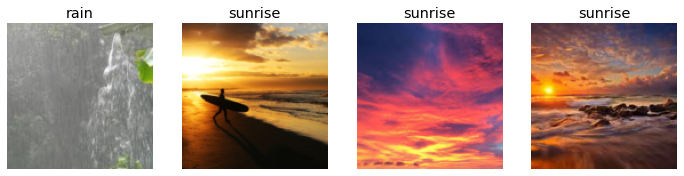

In [ ]:


dls.valid.show_batch(max_n=4, nrows=1)

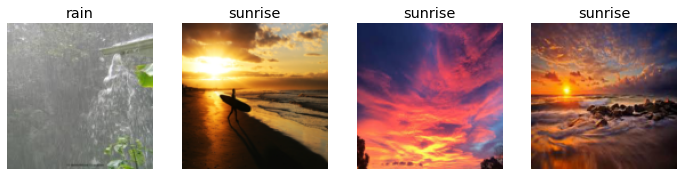

In [ ]:
weather = weather.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = weather.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

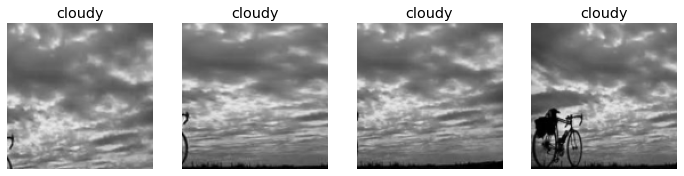

In [ ]:
weather = weather.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = weather.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

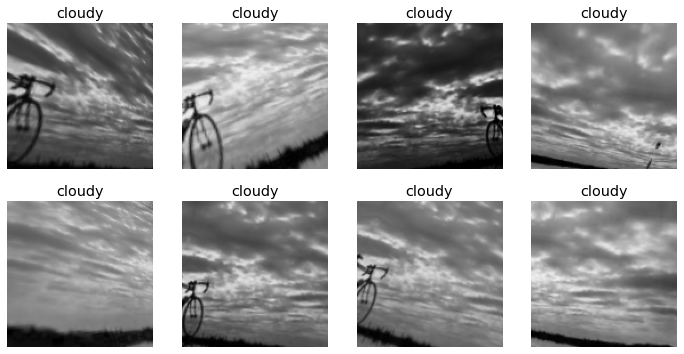

In [ ]:
weather = weather.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = weather.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
weather = weather.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = weather.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.288653,0.252630,0.071111,03:40


epoch,train_loss,valid_loss,error_rate,time
0,0.296378,0.152586,0.044444,04:32
1,0.192158,0.157904,0.040000,04:32
2,0.151361,0.134102,0.035556,04:32
3,0.126396,0.122837,0.031111,04:32


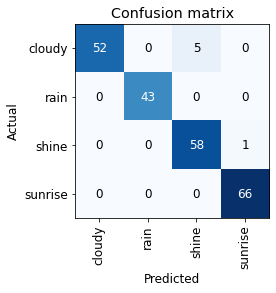

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

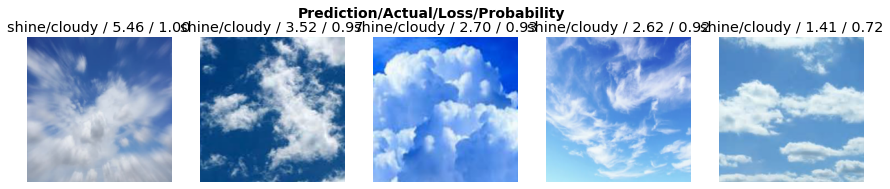

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [27]:
learn_inf.predict('gdrive/My Drive/CV/4ClassClassification/testcloudy1.jpg')

('cloudy', tensor(0), tensor([9.9999e-01, 1.6316e-06, 4.4209e-06, 1.5423e-06]))

In [28]:
learn_inf.dls.vocab


['cloudy', 'rain', 'shine', 'sunrise']

In [40]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [44]:
img = PILImage.create(btn_upload.data[-1])


In [45]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [46]:
pred,pred_idx,probs = learn_inf.predict(img)

In [47]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: rain; Probability: 1.0000')

In [50]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [51]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [52]:
btn_upload = widgets.FileUpload()

In [54]:
VBox([widgets.Label('THE BEST FORECASTIN SYSTEM EVA'), 
      btn_upload, btn_run, out_pl, lbl_pred])